In [23]:
#Step1 - Import libraries

import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

In [24]:
#Step2 - Import data set with connections

df = pd.read_csv('20231819_LinkedIn_Connections_Data_RowData2.csv')
df = df.dropna(subset=['Company', 'Position', 'Company_grouped','Area','Job'])
df.head()

,First Name,Last Name,URL,Email Address,Company,Position,Connected On,Company_grouped,Area,Job
0,Alvindra,Pratama,https://www.linkedin.com/in/alvindra-pratama-3...,NaN,Festo Southeast Asia,Application Engineer,17-Nov-23,Festo,SEA,SE
1,Matthias,Schiller,https://www.linkedin.com/in/matthias-schiller-...,NaN,Festo Vertrieb GmbH & Co. KG,Strategic Key Account Management,17-Nov-23,Festo,Laendle,KAM
2,Simon,Kaul,https://www.linkedin.com/in/simonkaul,NaN,HUGO BOSS,Team Leader IT Order Management,8-Nov-23,Hugo Boss,Laendle,IT
3,Nico,Mltschoch,https://www.linkedin.com/in/nico-mltschoch-477...,NaN,Festo Vertrieb GmbH & Co. KG,Spezialist Customer Demand Management,6-Nov-23,Festo,Laendle,Sales
4,Robert,Enrique Saladich,https://www.linkedin.com/in/robert-es,NaN,Festo España,Data Scientist,19-Oct-23,Festo,ES,Data Science


In [25]:
#Step3 - Data Understanding

# Statistische Zusammenfassung der Daten anzeigen
print(df.describe())

# Infos zur Tabelle anzeigen (Datentypen, Anzahl nicht-null Werte usw.)
print(df.info())

       First Name Last Name  \
count         565       565   
unique        400       540   
top       Michael      Shin   
freq           10         3   

                                                      URL  \
count                                                 565   
unique                                                565   
top     https://www.linkedin.com/in/alvindra-pratama-3...   
freq                                                    1   

                      Email Address Company         Position Connected On  \
count                             7     565              565          565   
unique                            7     238              532          381   
top     ram_jyothsna@rediffmail.com   Festo  General Manager    26-Dec-16   
freq                              1     234                6           25   

       Company_grouped     Area    Job  
count              565      565    565  
unique             186       35     43  
top              Festo  Laend

In [26]:
#Step4 - Visualization via Plot.ly - Companies of my network

# create root node for treemap
df['My Network'] = 'My Network'

#Company-centric Perspective
fig = px.treemap(df, path=['My Network', 'Company', 'Position'], width=1000, height=1000)
fig.show()

In [27]:
#Step5 - Visualization bar chart with new connections per year

#Step5.1 - Data Preparation

#Das Jahr extrahieren, bevor die Gruppierung erfolgt
df['Year'] = pd.to_datetime(df['Connected On']).dt.year.astype(str)

In [28]:
#Step 5.2 - Gruppierung nach Jahr und Zählen der Namen

name_counts = df.groupby('Year')['Last Name'].value_counts().unstack().fillna(0)

total_counts = name_counts.sum(axis=1)

print(total_counts)

Year
2016     48.0
2017    151.0
2018     64.0
2019     29.0
2020     49.0
2021     55.0
2022     93.0
2023     76.0
dtype: float64


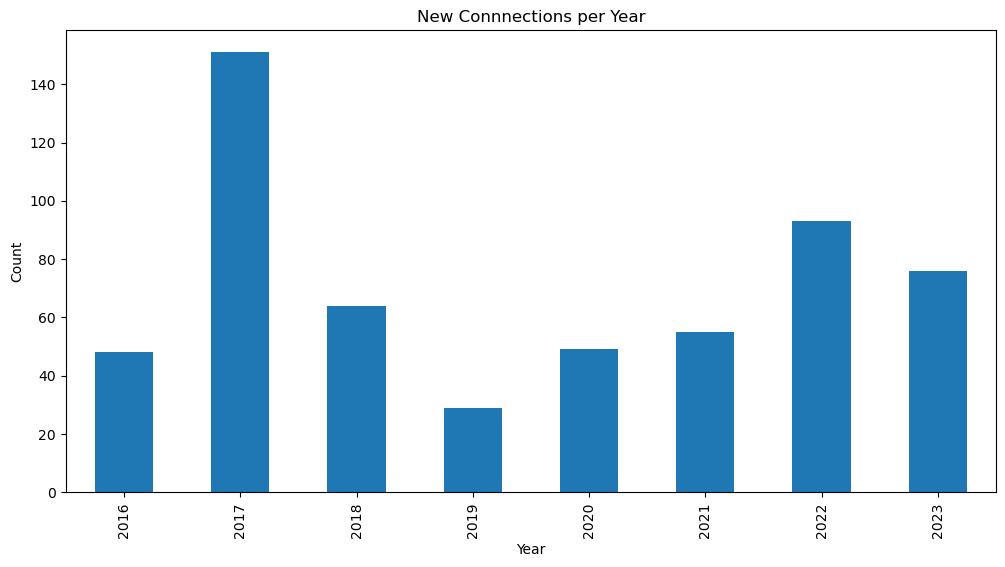

In [29]:
# Step 5.3 - Create Bar chart
# Balkendiagramm erstellen
plt.figure(figsize=(12, 6))
total_counts.plot(kind='bar', stacked=True)
plt.title('New Connnections per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [32]:
#Step6 - Visualization via Plot.ly - grouped Companies of my network

# create root node for treemap
df['My Network'] = 'My Network'

#Company-centric Perspective
fig = px.treemap(df, path=['My Network', 'Company_grouped', 'Job','Area'], width=1000, height=1000)
fig.show()

In [31]:
#Step7 - Visualization via Plot.ly - Areas of my network

# create root node for treemap
df['My Network'] = 'My Network'

#Company-centric Perspective
fig = px.treemap(df, path=['My Network', 'Area', 'Job'], width=1000, height=1000)
fig.show()

In [33]:
#Step8 - Visualization via Plot.ly - Jobs of my network

# create root node for treemap
df['My Network'] = 'My Network'

#Company-centric Perspective
fig = px.treemap(df, path=['My Network', 'Job'], width=1000, height=1000)
fig.show()